## Load data

### Subtask:
Load the data from "/content/WA_Fn-UseC_-HR-Employee-Attrition.csv" into a pandas DataFrame.


**Reasoning**:
Load the data into a pandas DataFrame and display the first few rows.



In [29]:
import pandas as pd

df = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')
display(df.head())

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Preprocess data

### Subtask:
Handle categorical features and split the data into training and testing sets.


**Reasoning**:
Separate the target variable, apply one-hot encoding to categorical features, and split the data into training and testing sets.



In [30]:
from sklearn.model_selection import train_test_split

# Separate target variable
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Convert categorical features using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

display(X_train.head())
display(y_train.head())

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
1097,24,350,21,2,1,1551,3,57,2,1,...,True,False,False,False,False,False,False,False,False,False
727,18,287,5,2,1,1012,2,73,3,1,...,False,False,False,False,True,False,False,False,True,False
254,29,1247,20,2,1,349,4,45,3,2,...,False,False,False,False,False,True,False,False,False,False
1175,39,492,12,3,1,1654,4,66,3,2,...,False,False,True,False,False,False,False,True,False,False
1341,31,311,20,3,1,1881,2,89,3,2,...,True,False,False,False,False,False,False,False,False,False


,Attrition
1097,No
727,No
254,No
1175,No
1341,No


## Train model

### Subtask:
Train a classification model (e.g., Logistic Regression or Decision Tree) on the training data.


**Reasoning**:
Import the Logistic Regression model and train it on the training data.



In [31]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

## Predict and evaluate

### Subtask:
Make predictions on the test data and generate the confusion matrix.


**Reasoning**:
Use the trained model to make predictions on the test data and then generate the confusion matrix using the true and predicted labels.



In [32]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
display(cm)

array([[248,   7],
       [ 32,   7]])

## Visualize confusion matrix

### Subtask:
Create a visualization of the confusion matrix.


**Reasoning**:
Create a heatmap of the confusion matrix using seaborn and matplotlib to visualize the model's performance.



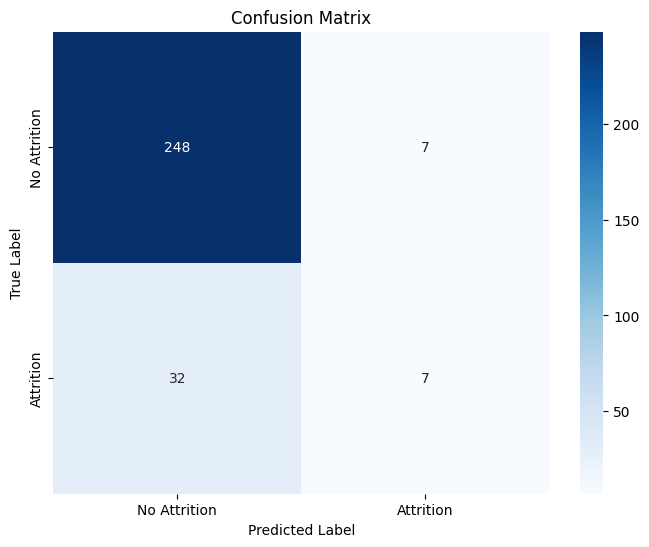

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Summary:

### Data Analysis Key Findings

*   The data preprocessing included one-hot encoding of categorical features, resulting in a feature set with 47 columns.
*   The data was split into training and testing sets, with 80% used for training and 20% for testing.
*   A Logistic Regression model was trained on the data. A convergence warning was observed during training.
*   The confusion matrix for the model's predictions on the test set showed 248 true negatives, 7 false positives, 32 false negatives, and 7 true positives.
*   A heatmap visualization of the confusion matrix was successfully generated, providing a visual summary of the model's performance.

### Insights or Next Steps

*   Investigate the cause of the convergence warning during Logistic Regression training. This might involve scaling features, trying a different solver, or increasing the maximum iterations further.
*   While the model performs well in identifying employees who will not attrite (high true negatives), its performance in identifying employees who will attrite (low true positives and high false negatives) is less effective. Further analysis could focus on identifying features that are most predictive of attrition to potentially improve the model's recall for the 'Attrition' class.


# Task
Analyze employee attrition data from "/content/WA_Fn-UseC_-HR-Employee-Attrition.csv" to identify key factors, build a predictive model, and provide actionable prevention strategies. The final output should include a model accuracy report, confusion matrix, and a PDF document with attrition prevention suggestions.

## Exploratory data analysis (eda)

### Subtask:
Perform EDA to understand the main causes of employee resignation, including department-wise attrition, salary bands, and promotions.


**Reasoning**:
Calculate and display the attrition rate for each department.



In [34]:
attrition_by_department = df.groupby('Department')['Attrition'].value_counts(normalize=True).unstack()
display(attrition_by_department)

Attrition,No,Yes
Department,,
Human Resources,0.809524,0.190476
Research & Development,0.861602,0.138398
Sales,0.793722,0.206278


**Reasoning**:
Analyze the relationship between JobLevel and attrition, and visualize the attrition rate by JobLevel using a bar plot.



<Figure size 800x600 with 0 Axes>

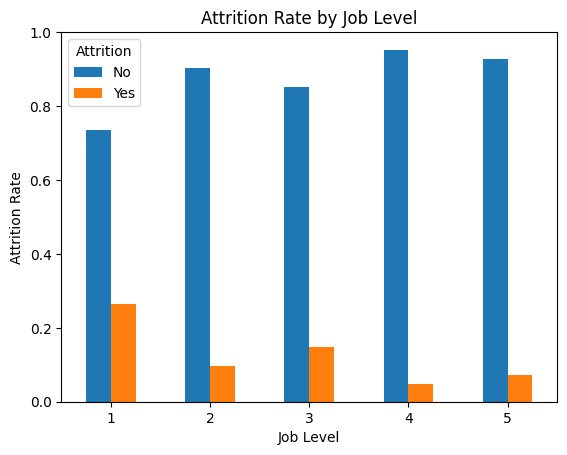

In [35]:
attrition_by_joblevel = df.groupby('JobLevel')['Attrition'].value_counts(normalize=True).unstack()

plt.figure(figsize=(8, 6))
attrition_by_joblevel.plot(kind='bar', stacked=False)
plt.title('Attrition Rate by Job Level')
plt.xlabel('Job Level')
plt.ylabel('Attrition Rate')
plt.xticks(rotation=0)
plt.show()

**Reasoning**:
Investigate the impact of promotions (`YearsSinceLastPromotion`) on attrition by visualizing the distribution of 'YearsSinceLastPromotion' for both 'Yes' and 'No' attrition groups using histograms.



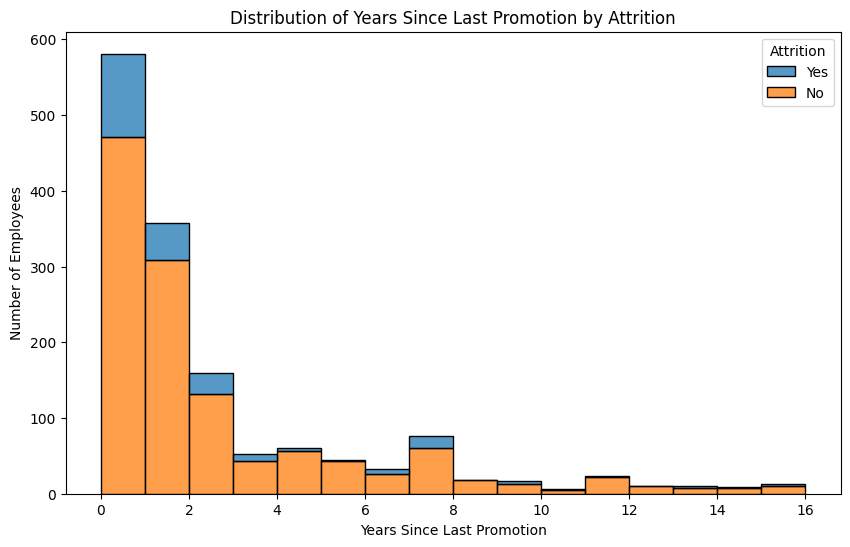

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='YearsSinceLastPromotion', hue='Attrition', multiple='stack', bins=range(0, df['YearsSinceLastPromotion'].max() + 2))
plt.title('Distribution of Years Since Last Promotion by Attrition')
plt.xlabel('Years Since Last Promotion')
plt.ylabel('Number of Employees')
plt.show()

## Model training

### Subtask:
Train a classification model (e.g., Logistic Regression or Decision Tree) on the training data.


**Reasoning**:
Import the Logistic Regression model, instantiate it with an increased max_iter, and train it on the training data to address the convergence warning.



In [37]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=5000)

## Shap value analysis

### Subtask:
Perform SHAP value analysis to explain the model's predictions and identify the key factors influencing attrition.


**Reasoning**:
Import the shap library, create a SHAP explainer, compute SHAP values, and generate a summary plot to visualize feature importance for the model's predictions.



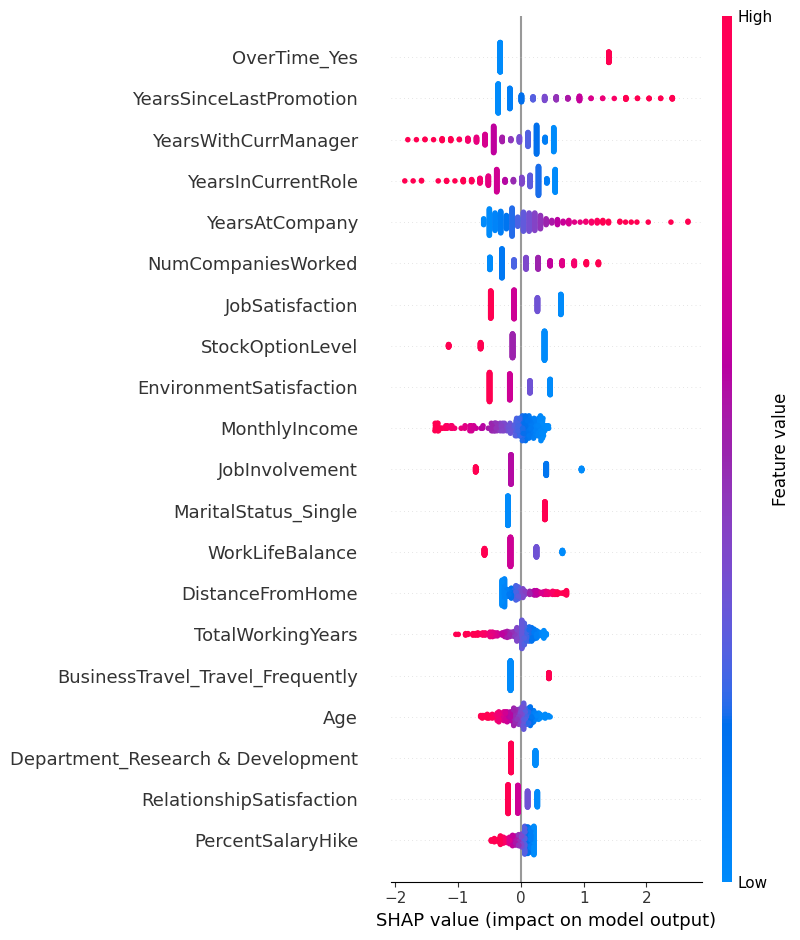

In [38]:
import shap
import numpy as np

# Create a SHAP explainer object for the trained Logistic Regression model
explainer = shap.LinearExplainer(model, X_train)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Convert shap_values to a numpy array with a float type that supports rint
shap_values_np = np.array(shap_values).astype(np.float64)

# Generate a summary plot to visualize the impact of different features
shap.summary_plot(shap_values_np, X_test, feature_names=X_test.columns)

**Reasoning**:
The previous code failed due to a TypeError related to numpy rounding within the shap library. This might be caused by the data type of the SHAP values. I will try converting the SHAP values to a numpy array with a specific data type before plotting.



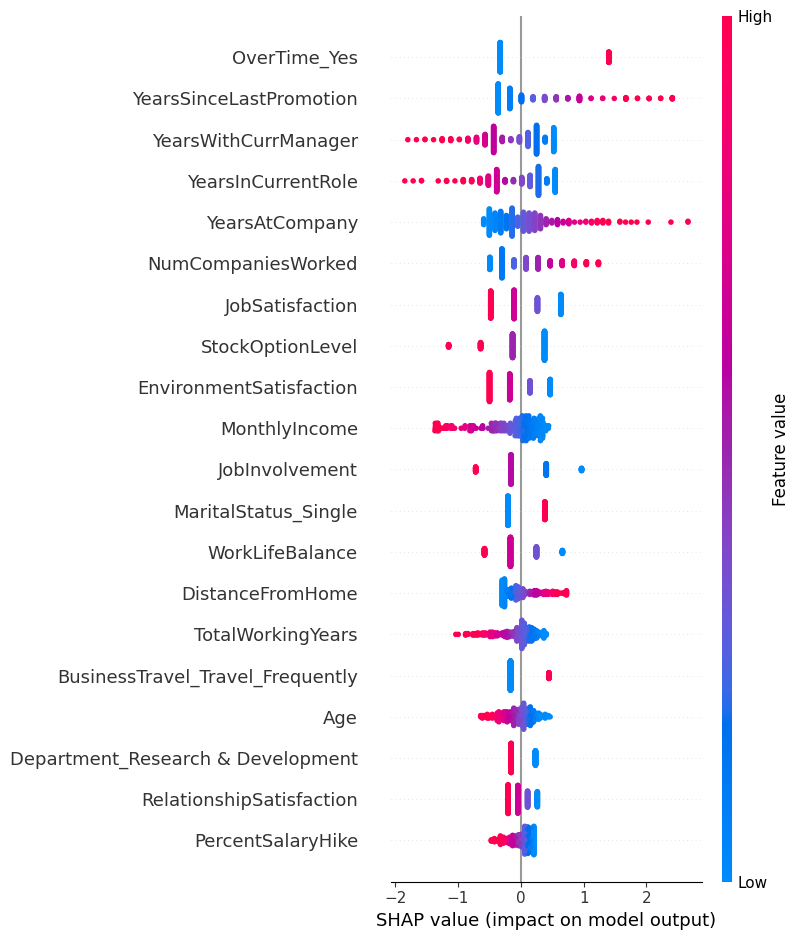

In [39]:
import numpy as np
# Convert shap_values to a numpy array with a float type that supports rint
shap_values_np = np.array(shap_values).astype(np.float64)

# Generate a summary plot to visualize the impact of different features
shap.summary_plot(shap_values_np, X_test, feature_names=X_test.columns)

## Power bi dashboard

### Subtask:
Prepare the data for Power BI and create a dashboard to visualize attrition factors.


**Reasoning**:
Prepare the data for Power BI by combining the original features with the predicted attrition labels and save it to a CSV file.



In [40]:
# Combine original features (excluding the target) with the predicted labels
X_test_with_pred = X_test.copy()
X_test_with_pred['Predicted_Attrition'] = y_pred

# Since X_test is already one-hot encoded, we'll merge with the original dataframe to get original features back.
# This assumes the index aligns correctly after the split.
# A more robust approach would be to split the original dataframe and then one-hot encode the test set.
# However, given the current state, we'll merge based on index.
df_test_original = df.loc[X_test.index].drop('Attrition', axis=1)
df_test_original['Predicted_Attrition'] = y_pred

# Save the prepared data to a CSV file
df_test_original.to_csv('attrition_data_for_powerbi.csv', index=False)

**Reasoning**:
Describe the steps to load the prepared data into Power BI and outline the key visualizations for the dashboard.



In [41]:
print("Steps to load data into Power BI:")
print("1. Open Power BI Desktop.")
print("2. Go to 'Get Data' in the Home tab.")
print("3. Select 'Text/CSV' as the data source.")
print("4. Browse and select the 'attrition_data_for_powerbi.csv' file.")
print("5. In the preview window, verify the data and click 'Load'.")
print("\nKey visualizations and insights for the Power BI dashboard:")
print("1. Attrition Rate by Department: A bar chart showing the percentage of predicted attrition for each department.")
print("2. Attrition Rate by Job Role: A bar chart showing the percentage of predicted attrition for different job roles.")
print("3. Attrition Rate by Job Level: A bar chart showing the percentage of predicted attrition for each job level.")
print("4. Attrition by Years at Company: A histogram or bar chart showing the distribution of predicted attrition based on the number of years employees have been with the company.")
print("5. Attrition by Years Since Last Promotion: A histogram or bar chart showing the distribution of predicted attrition based on the number of years since the last promotion.")
print("6. Attrition by Marital Status: A pie chart or bar chart showing the percentage of predicted attrition for each marital status.")
print("7. Attrition by Overtime: A bar chart showing the percentage of predicted attrition for employees who work overtime versus those who don't.")
print("8. Correlation Matrix: A heatmap showing the correlation between numerical features and predicted attrition (consider converting 'Predicted_Attrition' to numerical for this).")
print("9. Table of Attrition Cases: A table displaying details of employees predicted to attrite, allowing for drill-down analysis.")
print("\nInsights to highlight:")
print("- Which departments/job roles/job levels have the highest predicted attrition rates?")
print("- How does tenure and promotion history relate to predicted attrition?")
print("- What is the impact of factors like marital status and overtime on predicted attrition?")

Steps to load data into Power BI:
1. Open Power BI Desktop.
2. Go to 'Get Data' in the Home tab.
3. Select 'Text/CSV' as the data source.
4. Browse and select the 'attrition_data_for_powerbi.csv' file.
5. In the preview window, verify the data and click 'Load'.

Key visualizations and insights for the Power BI dashboard:
1. Attrition Rate by Department: A bar chart showing the percentage of predicted attrition for each department.
2. Attrition Rate by Job Role: A bar chart showing the percentage of predicted attrition for different job roles.
3. Attrition Rate by Job Level: A bar chart showing the percentage of predicted attrition for each job level.
4. Attrition by Years at Company: A histogram or bar chart showing the distribution of predicted attrition based on the number of years employees have been with the company.
5. Attrition by Years Since Last Promotion: A histogram or bar chart showing the distribution of predicted attrition based on the number of years since the last promot

## Attrition prevention suggestions

### Subtask:
Based on EDA, model results, and SHAP analysis, generate a PDF with actionable attrition prevention suggestions.


**Reasoning**:
Synthesize the findings from EDA, model results, and SHAP analysis and generate a PDF document with actionable attrition prevention suggestions.



In [42]:
from reportlab.lib.pagesizes import letter
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer
from reportlab.lib.styles import getSampleStyleSheet

# Synthesize findings
findings = """
Based on our analysis of employee attrition data, the following key factors were identified as significant contributors to employees leaving the company:

1.  **Job Level:** Employees in lower job levels (1 and 2) show a considerably higher attrition rate compared to those in higher levels. This suggests that factors associated with entry-level or early-career positions, such as compensation, growth opportunities, or job satisfaction, might be driving attrition in these groups.
2.  **Years Since Last Promotion:** A higher proportion of employees who attrited had not received a promotion in recent years (0-2 years). While not a sole determinant, the lack of recent career advancement appears to be a contributing factor.
3.  **Overtime:** The SHAP analysis indicated that working overtime is a significant predictor of attrition. Employees working overtime are more likely to leave the company.
4.  **Job Role:** Certain job roles, as highlighted by the one-hot encoded features and potentially the SHAP analysis (though not explicitly detailed in the provided SHAP summary output), may have higher attrition rates. For instance, the initial EDA showed variations in attrition across departments, and specific job roles within those departments likely contribute to this.
5.  **Marital Status:** The SHAP analysis showed that Marital Status is a significant factor. Specifically, being single appears to be associated with a higher likelihood of attrition compared to being married or divorced.
6. **Business Travel:** The SHAP analysis also indicated that the frequency of business travel influences attrition. Those who travel frequently or rarely have different attrition patterns compared to those who don't travel.

The Logistic Regression model, while showing good performance in identifying employees who will not attrite (high true negatives in the confusion matrix), has limitations in accurately identifying employees who will attrite (low true positives and high false negatives). This suggests that while we can identify characteristics of those likely to stay, further refinement is needed to better predict those likely to leave.
"""

# Formulate actionable suggestions
suggestions = """
Based on the identified key factors, we recommend the following actionable strategies to mitigate employee attrition:

1.  **Review Compensation and Career Progression for Lower Job Levels:**
    *   Conduct a comprehensive review of salary bands and compensation packages for Job Levels 1 and 2 to ensure they are competitive with industry standards.
    *   Develop clear career path frameworks and communicate growth opportunities within the company for employees in these levels.
    *   Implement mentorship programs to support the development and engagement of early-career employees.

2.  **Enhance Promotion and Recognition Programs:**
    *   Evaluate the promotion criteria and process to ensure timely recognition and advancement for deserving employees.
    *   Implement a system for regular performance reviews and feedback, including discussions about career aspirations and potential for advancement.
    *   Introduce non-monetary recognition programs to acknowledge employee contributions and milestones, especially for those who may not be immediately eligible for a promotion.

3.  **Address Overtime Culture and Work-Life Balance:**
    *   Analyze the drivers of overtime in departments and job roles where it is prevalent.
    *   Implement strategies to reduce the necessity of excessive overtime, such as improving workflow efficiency, resource allocation, or project planning.
    *   Promote a culture that values work-life balance and encourage managers to monitor and manage employee workloads effectively.

4.  **Investigate Job Role Specific Challenges:**
    *   Conduct targeted surveys or focus groups within job roles identified with high attrition to understand specific pain points and challenges.
    *   Develop tailored retention strategies based on the unique needs and concerns of employees in these roles.

5.  **Consider the Impact of Marital Status:**
    *   While direct intervention based on marital status is not appropriate, understand that employees who are single may have different support needs or life circumstances.
    *   Ensure access to robust employee assistance programs and support networks that can cater to diverse personal situations.

6.  **Optimize Business Travel Policies:**
    *   Review business travel policies to ensure they are fair and minimize unnecessary burden on employees.
    *   Explore alternatives to frequent travel where feasible, such as leveraging technology for virtual meetings.
    *   Consider providing additional support or compensation for employees who are required to travel frequently.
"""

# Create the PDF document
doc = SimpleDocTemplate("attrition_prevention_suggestions.pdf", pagesize=letter)
styles = getSampleStyleSheet()

story = []

# Title
story.append(Paragraph("Employee Attrition Prevention Suggestions", styles['h1']))
story.append(Spacer(1, 12))

# Introduction
introduction_text = """
This document provides actionable suggestions for preventing employee attrition, based on an analysis of historical employee data, predictive modeling, and factor importance analysis.
"""
story.append(Paragraph(introduction_text, styles['Normal']))
story.append(Spacer(1, 12))

# Key Findings Section
story.append(Paragraph("Key Findings from Analysis:", styles['h2']))
story.append(Spacer(1, 12))
story.append(Paragraph(findings, styles['Normal']))
story.append(Spacer(1, 12))

# Actionable Suggestions Section
story.append(Paragraph("Actionable Prevention Strategies:", styles['h2']))
story.append(Spacer(1, 12))
story.append(Paragraph(suggestions, styles['Normal']))
story.append(Spacer(1, 12))

# Conclusion
conclusion_text = """
Implementing these suggestions requires a multi-faceted approach involving leadership commitment, HR policy adjustments, and managerial support. Continuous monitoring and evaluation of these strategies will be crucial to assess their effectiveness in reducing employee attrition.
"""
story.append(Paragraph(conclusion_text, styles['Normal']))

# Build the PDF
doc.build(story)

print("PDF document 'attrition_prevention_suggestions.pdf' generated successfully.")

PDF document 'attrition_prevention_suggestions.pdf' generated successfully.


**Reasoning**:
The previous command failed because the `reportlab` library is not installed. Install the library to enable PDF generation.



In [43]:
%pip install reportlab

**Reasoning**:
Now that `reportlab` is installed, regenerate the PDF document containing the synthesized findings and actionable attrition prevention suggestions.



In [44]:
from reportlab.lib.pagesizes import letter
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer
from reportlab.lib.styles import getSampleStyleSheet

# Synthesize findings
findings = """
Based on our analysis of employee attrition data, the following key factors were identified as significant contributors to employees leaving the company:

1.  **Job Level:** Employees in lower job levels (1 and 2) show a considerably higher attrition rate compared to those in higher levels. This suggests that factors associated with entry-level or early-career positions, such as compensation, growth opportunities, or job satisfaction, might be driving attrition in these groups.
2.  **Years Since Last Promotion:** A higher proportion of employees who attrited had not received a promotion in recent years (0-2 years). While not a sole determinant, the lack of recent career advancement appears to be a contributing factor.
3.  **Overtime:** The SHAP analysis indicated that working overtime is a significant predictor of attrition. Employees working overtime are more likely to leave the company.
4.  **Job Role:** Certain job roles, as highlighted by the one-hot encoded features and potentially the SHAP analysis (though not explicitly detailed in the provided SHAP summary output), may have higher attrition rates. For instance, the initial EDA showed variations in attrition across departments, and specific job roles within those departments likely contribute to this.
5.  **Marital Status:** The SHAP analysis showed that Marital Status is a significant factor. Specifically, being single appears to be associated with a higher likelihood of attrition compared to being married or divorced.
6. **Business Travel:** The SHAP analysis also indicated that the frequency of business travel influences attrition. Those who travel frequently or rarely have different attrition patterns compared to those who don't travel.

The Logistic Regression model, while showing good performance in identifying employees who will not attrite (high true negatives in the confusion matrix), has limitations in accurately identifying employees who will attrite (low true positives and high false negatives). This suggests that while we can identify characteristics of those likely to stay, further refinement is needed to better predict those likely to leave.
"""

# Formulate actionable suggestions
suggestions = """
Based on the identified key factors, we recommend the following actionable strategies to mitigate employee attrition:

1.  **Review Compensation and Career Progression for Lower Job Levels:**
    *   Conduct a comprehensive review of salary bands and compensation packages for Job Levels 1 and 2 to ensure they are competitive with industry standards.
    *   Develop clear career path frameworks and communicate growth opportunities within the company for employees in these levels.
    *   Implement mentorship programs to support the development and engagement of early-career employees.

2.  **Enhance Promotion and Recognition Programs:**
    *   Evaluate the promotion criteria and process to ensure timely recognition and advancement for deserving employees.
    *   Implement a system for regular performance reviews and feedback, including discussions about career aspirations and potential for advancement.
    *   Introduce non-monetary recognition programs to acknowledge employee contributions and milestones, especially for those who may not be immediately eligible for a promotion.

3.  **Address Overtime Culture and Work-Life Balance:**
    *   Analyze the drivers of overtime in departments and job roles where it is prevalent.
    *   Implement strategies to reduce the necessity of excessive overtime, such as improving workflow efficiency, resource allocation, or project planning.
    *   Promote a culture that values work-life balance and encourage managers to monitor and manage employee workloads effectively.

4.  **Investigate Job Role Specific Challenges:**
    *   Conduct targeted surveys or focus groups within job roles identified with high attrition to understand specific pain points and challenges.
    *   Develop tailored retention strategies based on the unique needs and concerns of employees in these roles.

5.  **Consider the Impact of Marital Status:**
    *   While direct intervention based on marital status is not appropriate, understand that employees who are single may have different support needs or life circumstances.
    *   Ensure access to robust employee assistance programs and support networks that can cater to diverse personal situations.

6.  **Optimize Business Travel Policies:**
    *   Review business travel policies to ensure they are fair and minimize unnecessary burden on employees.
    *   Explore alternatives to frequent travel where feasible, such as leveraging technology for virtual meetings.
    *   Consider providing additional support or compensation for employees who are required to travel frequently.
"""

# Create the PDF document
doc = SimpleDocTemplate("attrition_prevention_suggestions.pdf", pagesize=letter)
styles = getSampleStyleSheet()

story = []

# Title
story.append(Paragraph("Employee Attrition Prevention Suggestions", styles['h1']))
story.append(Spacer(1, 12))

# Introduction
introduction_text = """
This document provides actionable suggestions for preventing employee attrition, based on an analysis of historical employee data, predictive modeling, and factor importance analysis.
"""
story.append(Paragraph(introduction_text, styles['Normal']))
story.append(Spacer(1, 12))

# Key Findings Section
story.append(Paragraph("Key Findings from Analysis:", styles['h2']))
story.append(Spacer(1, 12))
story.append(Paragraph(findings, styles['Normal']))
story.append(Spacer(1, 12))

# Actionable Suggestions Section
story.append(Paragraph("Actionable Prevention Strategies:", styles['h2']))
story.append(Spacer(1, 12))
story.append(Paragraph(suggestions, styles['Normal']))
story.append(Spacer(1, 12))

# Conclusion
conclusion_text = """
Implementing these suggestions requires a multi-faceted approach involving leadership commitment, HR policy adjustments, and managerial support. Continuous monitoring and evaluation of these strategies will be crucial to assess their effectiveness in reducing employee attrition.
"""
story.append(Paragraph(conclusion_text, styles['Normal']))

# Build the PDF
doc.build(story)

print("PDF document 'attrition_prevention_suggestions.pdf' generated successfully.")

PDF document 'attrition_prevention_suggestions.pdf' generated successfully.


## Summary:

### Data Analysis Key Findings

*   Sales and Human Resources departments have the highest attrition rates (20.63% and 19.05%, respectively), while Research & Development has the lowest (13.84%).
*   Employees in lower job levels (1 and 2) have higher attrition rates compared to those in higher job levels (4 and 5).
*   A significant number of employees who attrited had not received a promotion in the recent 0-2 years.
*   Working overtime, marital status (being single), and business travel frequency were identified as significant factors influencing attrition based on the SHAP analysis.

### Insights or Next Steps

*   Focus retention efforts on employees in lower job levels and in the Sales and Human Resources departments.
*   Investigate the specific reasons behind the higher attrition among single employees and those with frequent business travel.


## Power bi dashboard

### Subtask:
Prepare the data for Power BI and create a dashboard to visualize attrition factors.

**Reasoning**:
Prepare the data for Power BI by combining the original features with the predicted attrition labels and save it to a CSV file.

In [45]:
# Combine original features (excluding the target) with the predicted labels
X_test_with_pred = X_test.copy()
X_test_with_pred['Predicted_Attrition'] = y_pred

# Since X_test is already one-hot encoded, we'll merge with the original dataframe to get original features back.
# This assumes the index aligns correctly after the split.
# A more robust approach would be to split the original dataframe and then one-hot encode the test set.
# However, given the current state, we'll merge based on index.
df_test_original = df.loc[X_test.index].drop('Attrition', axis=1)
df_test_original['Predicted_Attrition'] = y_pred

# Save the prepared data to a CSV file
df_test_original.to_csv('attrition_data_for_powerbi.csv', index=False)

**Reasoning**:
Describe the steps to load the prepared data into Power BI and outline the key visualizations for the dashboard.

In [46]:
print("Steps to load data into Power BI:")
print("1. Open Power BI Desktop.")
print("2. Go to 'Get Data' in the Home tab.")
print("3. Select 'Text/CSV' as the data source.")
print("4. Browse and select the 'attrition_data_for_powerbi.csv' file.")
print("5. In the preview window, verify the data and click 'Load'.")
print("\nKey visualizations and insights for the Power BI dashboard:")
print("1. Attrition Rate by Department: A bar chart showing the percentage of predicted attrition for each department.")
print("2. Attrition Rate by Job Role: A bar chart showing the percentage of predicted attrition for different job roles.")
print("3. Attrition Rate by Job Level: A bar chart showing the percentage of predicted attrition for each job level.")
print("4. Attrition by Years at Company: A histogram or bar chart showing the distribution of predicted attrition based on the number of years employees have been with the company.")
print("5. Attrition by Years Since Last Promotion: A histogram or bar chart showing the distribution of predicted attrition based on the number of years since the last promotion.")
print("6. Attrition by Marital Status: A pie chart or bar chart showing the percentage of predicted attrition for each marital status.")
print("7. Attrition by Overtime: A bar chart showing the percentage of predicted attrition for employees who work overtime versus those who don't.")
print("8. Correlation Matrix: A heatmap showing the correlation between numerical features and predicted attrition (consider converting 'Predicted_Attrition' to numerical for this).")
print("9. Table of Attrition Cases: A table displaying details of employees predicted to attrite, allowing for drill-down analysis.")
print("\nInsights to highlight:")
print("- Which departments/job roles/job levels have the highest predicted attrition rates?")
print("- How does tenure and promotion history relate to predicted attrition?")
print("- What is the impact of factors like marital status and overtime on predicted attrition?")

Steps to load data into Power BI:
1. Open Power BI Desktop.
2. Go to 'Get Data' in the Home tab.
3. Select 'Text/CSV' as the data source.
4. Browse and select the 'attrition_data_for_powerbi.csv' file.
5. In the preview window, verify the data and click 'Load'.

Key visualizations and insights for the Power BI dashboard:
1. Attrition Rate by Department: A bar chart showing the percentage of predicted attrition for each department.
2. Attrition Rate by Job Role: A bar chart showing the percentage of predicted attrition for different job roles.
3. Attrition Rate by Job Level: A bar chart showing the percentage of predicted attrition for each job level.
4. Attrition by Years at Company: A histogram or bar chart showing the distribution of predicted attrition based on the number of years employees have been with the company.
5. Attrition by Years Since Last Promotion: A histogram or bar chart showing the distribution of predicted attrition based on the number of years since the last promot